<a href="https://colab.research.google.com/github/manjushatr/mlsamples/blob/main/RedWineQualityDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)



<ipython-input-1-579e633a150c>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
#loading the data file from local drive (loan_train.csv)
from google.colab import files
uploaded= files.upload()

Saving red-wine.csv to red-wine.csv


In [3]:
#loading the data to pandas data frane using read_csv method
import pandas as pd

import io
red_wine = pd.read_csv(io.BytesIO(uploaded['red-wine.csv']))

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine.shape # (rows, columns)

(1599, 12)

## Define a Linear Model

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model =  keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [7]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.07793456],
       [ 0.39514655],
       [ 0.5040303 ],
       [ 0.61350626],
       [ 0.58330005],
       [ 0.10703075],
       [-0.19091529],
       [ 0.44010144],
       [-0.46630597],
       [ 0.45074183],
       [ 0.6663467 ]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


4/4 [==============================] - 0s 3ms/step


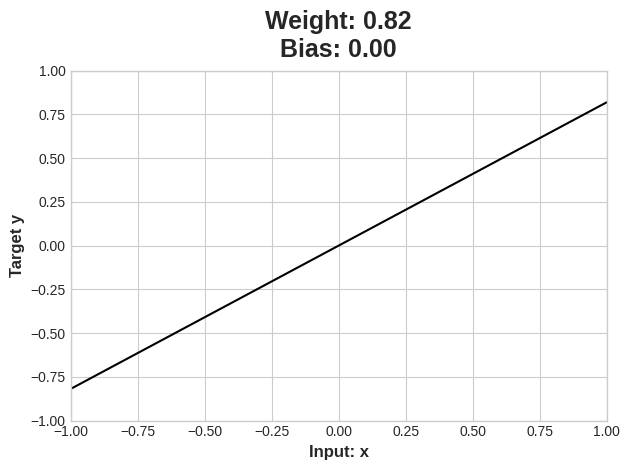

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [9]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [10]:
print(X_train.shape)

(1119, 11)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [12]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 128ms/step - loss: 0.2473 - val_loss: 0.1406
Epoch 2/10
5/5 [==============================] - 0s 55ms/step - loss: 0.1460 - val_loss: 0.1237
Epoch 3/10
5/5 [==============================] - 0s 52ms/step - loss: 0.1279 - val_loss: 0.1215
Epoch 4/10
5/5 [==============================] - 0s 62ms/step - loss: 0.1219 - val_loss: 0.1100
Epoch 5/10
5/5 [==============================] - 0s 56ms/step - loss: 0.1160 - val_loss: 0.1099
Epoch 6/10
5/5 [==============================] - 0s 57ms/step - loss: 0.1088 - val_loss: 0.1036
Epoch 7/10
5/5 [==============================] - 0s 52ms/step - loss: 0.1052 - val_loss: 0.1062
Epoch 8/10
5/5 [==============================] - 0s 66ms/step - loss: 0.1031 - val_loss: 0.1012
Epoch 9/10
5/5 [==============================] - 0s 64ms/step - loss: 0.1044 - val_loss: 0.1078
Epoch 10/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1016 - val_loss: 0.0995


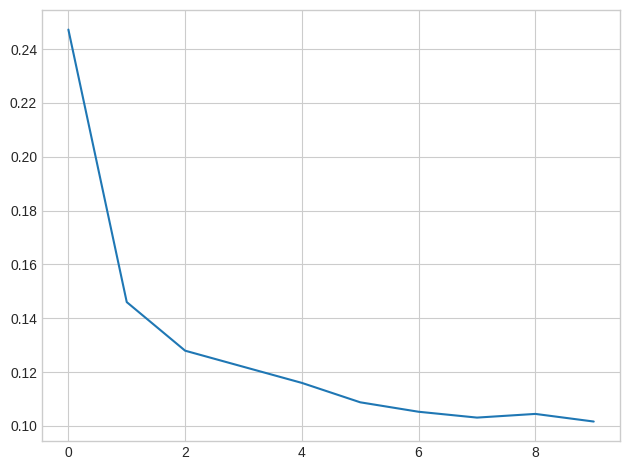

In [14]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();